In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Step 1: Data Overview
print("Dataset Overview:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1

In [ ]:
# Step 2: Data Cleaning
# Replace 0 values in certain columns with the column mean (excluding Pregnancies and Outcome)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    data[col] = data[col].replace(0, data[col].mean())
print("\nData After Cleaning:")
print(data.head())


Data After Cleaning:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


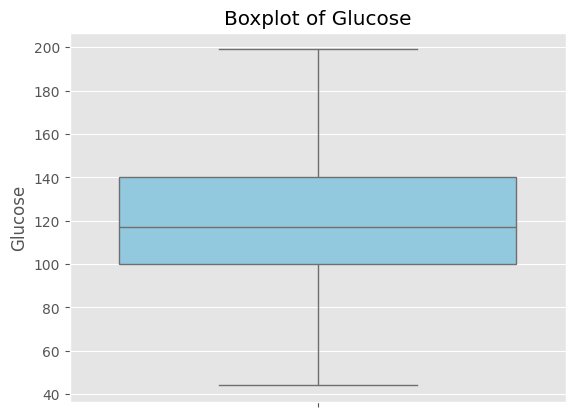

In [ ]:
# Example: Boxplot for visualizing outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['Glucose'], color='skyblue')
plt.title("Boxplot of Glucose")
plt.show()

In [ ]:
# Step 3: Correlation Analysis
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
print(corr_matrix['Outcome'].sort_values(ascending=False))


Correlation Matrix:
Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64


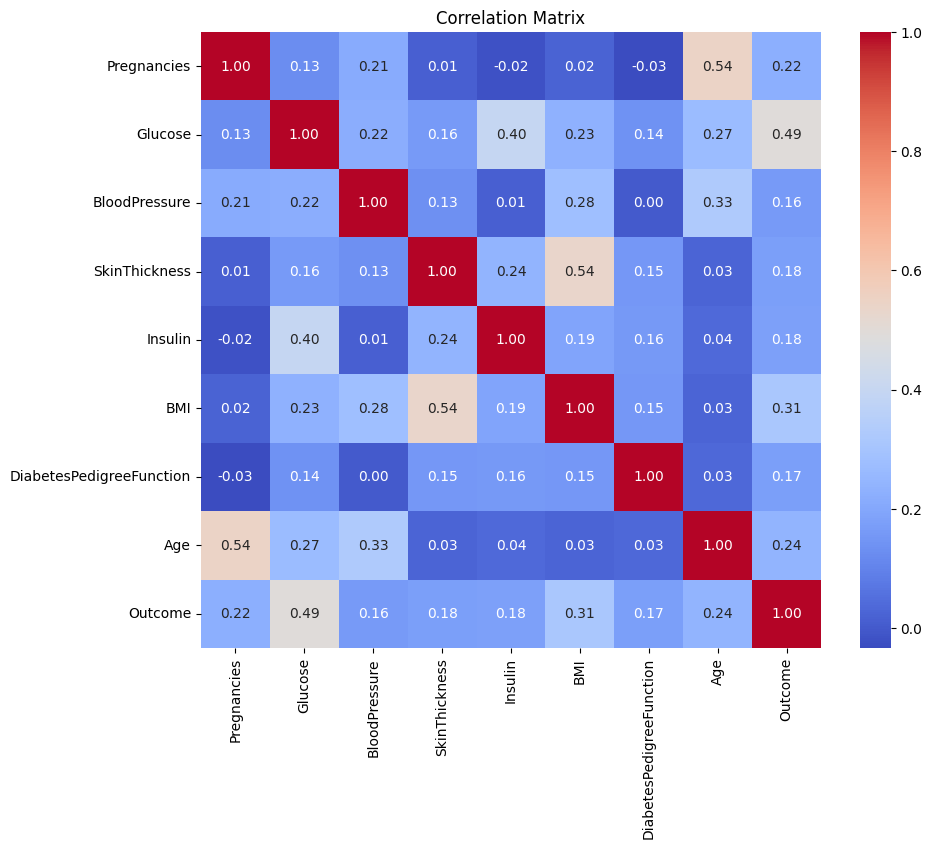

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Step 4: Train-Test Split
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 5: Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)


In [ ]:
# Coefficients for risk analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nLogistic Regression Coefficients:")
print(coefficients)



Logistic Regression Coefficients:
                    Feature  Coefficient
1                   Glucose     1.125242
5                       BMI     0.731232
7                       Age     0.392883
0               Pregnancies     0.222121
6  DiabetesPedigreeFunction     0.211802
3             SkinThickness     0.016782
2             BloodPressure    -0.168075
4                   Insulin    -0.185871


In [ ]:
# Step 6: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Feature Importance for risk analysis
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_importance)


Random Forest Feature Importance:
                    Feature  Importance
1                   Glucose    0.261854
5                       BMI    0.162860
7                       Age    0.135819
6  DiabetesPedigreeFunction    0.123334
2             BloodPressure    0.089523
4                   Insulin    0.082699
0               Pregnancies    0.075925
3             SkinThickness    0.067985


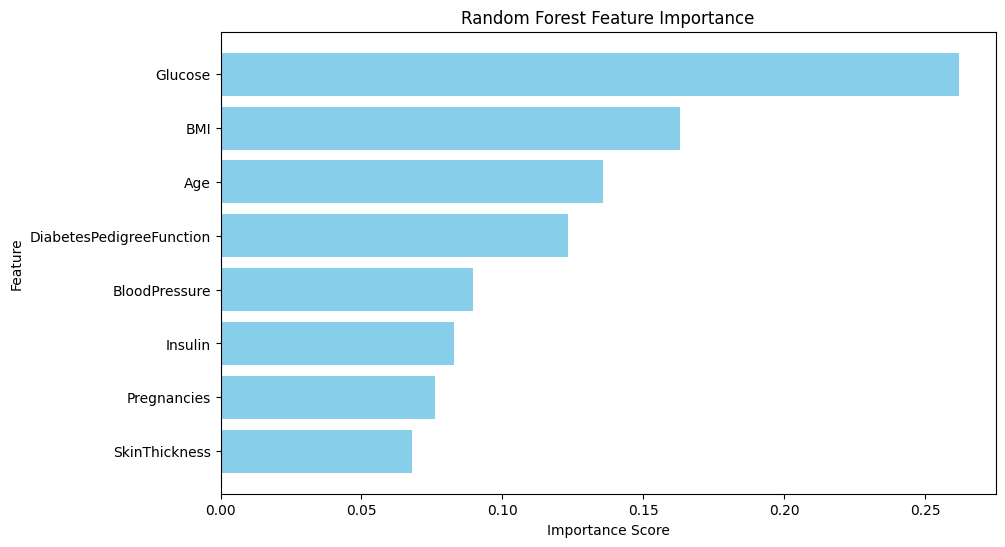

In [ ]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Step 7: Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Logistic Regression Evaluation ---
Accuracy: 0.77
Precision: 0.69
Recall: 0.64
F1-Score: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



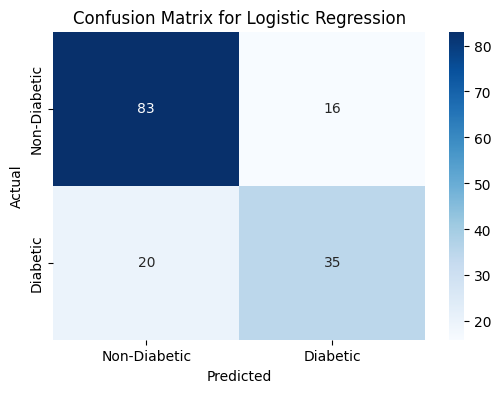


--- Random Forest Evaluation ---
Accuracy: 0.77
Precision: 0.67
Recall: 0.69
F1-Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



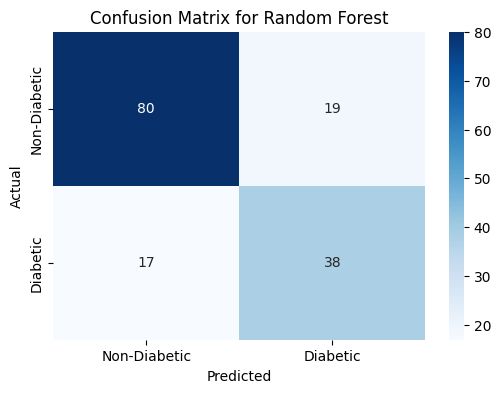

In [ ]:
# Evaluate Logistic Regression
evaluate_model(log_model, X_test, y_test, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

In [ ]:
import matplotlib.pyplot as plt